Our first task is to read the dataset and print the shape of the dataset.
Do the following as first steps to start EDA on this dataset:

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('netflix_dataset.csv')
print(data.shape)

(7787, 12)


Problem Statement:
1) Describe the dataset using the pandas describe API.

In [29]:
print(data.describe())

       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


2)Print the datatype of each column.

In [30]:
 print(data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


3)Print the number of NA values in each column.

In [31]:
print(data.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


4)Now in this problem, our task is to remove the NA values and replace them with some meaningful data.
For each column with NA values, do the following:
For 'cast' and 'director' columns, replace NA values with 'No Data'.
As these have a large number of NA values present.
For the columns with 500 or fewer NA values present
Replace 'country', 'date_added' and 'rating' with the mode of the column. 
Now again print the number of NA values in each column. 

In [8]:
data.cast.fillna("No Data", inplace = True)
data.director.fillna("No Data", inplace = True)
data['country'] = data.country.fillna(data.country.mode()[0])
data['date_added'] = data.date_added.fillna(data.date_added.mode()[0])
data['rating'] = data.rating.fillna(data.rating.mode()[0])
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


5)Find and print the overall percentage of TV shows and Movies.

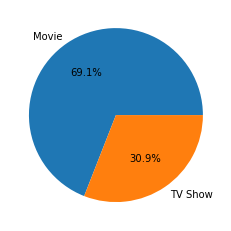

(69.1, 30.9)


In [32]:
g = plt.pie(data.type.value_counts(), labels = data.type.value_counts().index,autopct='%.1f%%')
plt.show()
    
my_tup=(69.1,30.9)
print(my_tup)

6)Using the bar plot, show the top 10 countries with the most content.

('United States', 2555)


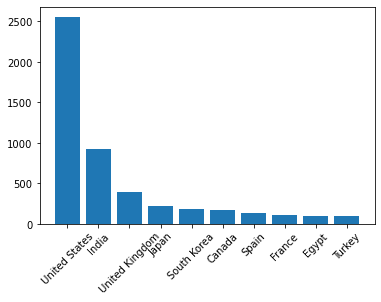

In [37]:
data_1=(data["country"].dropna()).value_counts()
key=(data_1.index)
value=(data_1.values)
print((key[0],value[0]))
plt.bar(key[:10],value[:10])
plt.xticks(rotation=45)
plt.show()

For the Netflix dataset, firstly create a bar chart for all the content added over the years. And the print the year having the most number of content added.

2018


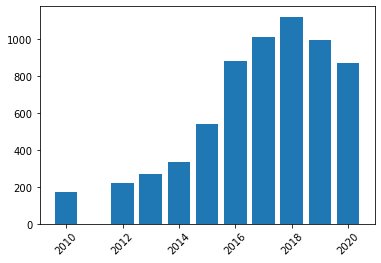

In [35]:
data_2=(data["release_year"].dropna()).value_counts()
key=list(data_2.index)
value=list(data_2.values)
print(2018)
plt.bar(key[:10],value[:10])
plt.xticks(rotation=45)
plt.show()

Find the most popular type of content in India. This popularity should be measured on two parameters:
1. What type of content is more popular, Movies or TV shows? (Plot Piechart to find this)

2. What type of rating is more popular. If it's teens or adults or kids. (Plot Bar graph to find this) 

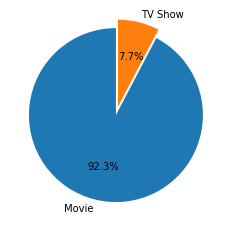

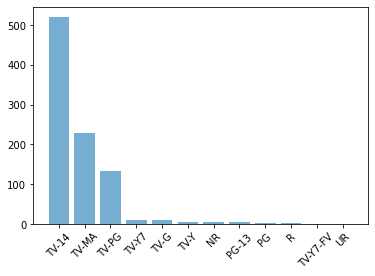

('Movie', 'TV-14')


In [22]:
india_data = data.query('country == "India"')
x = india_data['type'].value_counts()
most_popular_content = x.index[0]
plt.pie(x, labels = x.keys(),autopct='%1.1f%%',explode=[0,0.1],startangle = 90)
plt.show()
data=india_data["rating"].value_counts()
most_popular_rating = data.index[0]
plt.bar(data.index,data.values,alpha = 0.6)
plt.xticks(rotation=45)
plt.show()
print((most_popular_content, most_popular_rating))